1(a)
Graph A best represents how a plot would look for the speeds of points on a merry-go-round. A merry-go-round rotates as a rigid body, which means that the angular frequency is constant and the velocity is directly proportional to the distance from the center. Graph C best represents how a plot would look for the speeds of the planets in our solar system. From the Virial Theorem, the velocity is proportional to the square root of the mass enclosed and the inverse square root of the distance from the center. In our solar system almost all of the mass in the system is found in the sun. Therefore the mass enclosed does not increase as the radius increases and the velocity simply drops off as $r^{\frac{-1}{2}}$.

Find the power law form for the velocity as a function of the radius and find $\rho(r)$ for all of the systems:
A: $v = \omega r$, where $\omega$ is constant. Therefore v is proportional to r. By the Virial Theorem, $v^{2} = \frac{G M}{r}$, M must be proportional to $r^{3}$. 
$$M(<r) = \int_{0}^{r}  k 4 \pi \rho dr$$ 
Therefore, $\rho(r) = k r^2$

B: $v = const$ for much of the curve. Therefore v has no dependence on r. Using the Virial Theorem, M enclosed must be proportional to r. Therefore $\rho(r) = const$

C: From the graph it looks like $v = k r^{\frac{-1}{2}}$. Therefore M is proportional to $r^{2}$ and $\rho = kr^{3}$

D: $v = k r^{2}$. Therefore M is proportional to $r^{5}$ and $\rho = k r^{5}$

1(b) The enclosed mass is roughtly constant in the central 1pc because the mass from the black hole at the center of the galaxy is large enough that the added mass from the stars does not make a significant contribution within the first parsec. 

Use the Virial Theorem: $$v^{2} = \frac{G M}{r}$$

For the inner 1pc: $M = $ const. Therefore v should fall off as $r^{-\frac{1}{2}}$.


Up to $r \approx 10kpc$: If $M(<r)\propto r$, by the Virial Theorem $v^{2} = \frac{G k r}{r} = G k$ where k and G are both constants. Therefore v will be a constant in this region.




For $r>10kpc$: $M = $ const again. Therefore v should once again fall off as $r^{-\frac{1}{2}}$.


1(c) My answer does not agree with the rotational curve form that we observe in our galaxy. Firstly, the velocity increases at first instead of falling off as $r^{-\frac{1}{2}}$. Therefore the mass in the center one pc must not be constant. The model then holds for a bit as there is a section where the velocity is independent of distance. However, the velocity continues to be constant for $r>10kpc$ instead of beginning to fall off again. This suggests that M is not constant at this radius and instead mass is still being added at about the rate of $M(<r) \propto r$.

2(a), (b), (c), and (d):

The following code plots the data points, the velocities due to each individual component of the mass, the total velocity from all of the mass, and the total velocity with dark matter added to fit the data points.

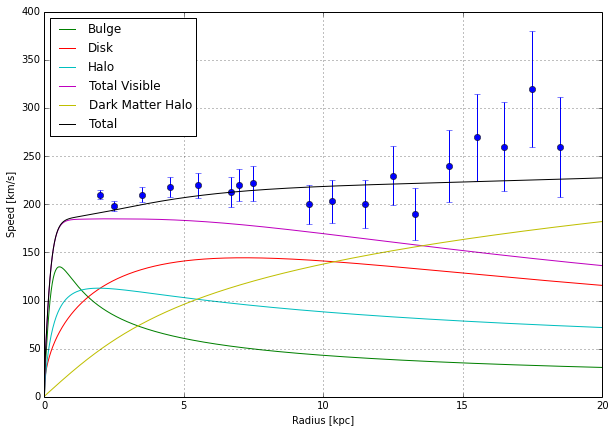

In [99]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

with open("velocity.dat") as textfile:
    lines = [line.split() for line in textfile]

#print lines

radius = np.zeros(18)
velocity = np.zeros(18)
errors = np.zeros(18)

for i in range(0, 18):
    radius[i] = float(lines[i][0])
    velocity[i] = float(lines[i][1])
    errors[i] = (radius[i]/18.5)*velocity[i]*(.2)
    
#print radius
#print velocity
#print errors

def rhoPlummer(r,a,exp):
    return 1.3e10*(1 + (r/a)**2.)**(exp)/(4*np.pi*a**3.)

def rhoHalo(r):
    return 1e9*((.5+r))**(-3.1)

def epsDisk(r):
    return 6.5e10/(2.*np.pi*4**2.) * np.exp(-r/4)

def dmdrPlummer(r,a,exp):
    return 4*np.pi*r**2.*rhoPlummer(r,a,exp)

def dmdrHalo(r):
    return 4*np.pi*r**2.*rhoHalo(r)

def dmdrDisk(r):
    return 2*np.pi*r*epsDisk(r)

count = 1000
r = np.linspace(1e-2, 20, count)
MBulge = np.zeros(count)
MDisk = np.zeros(count)
MHalo = np.zeros(count)
vBulge = np.zeros(count)
vDisk = np.zeros(count)
vHalo = np.zeros(count)

for i in range(count):
    if i == 0:
        MBulge[i] = 1
        MDisk[i] = 1
        MHalo[i] = 1
        vBulge[i] = 0
        vDisk[i] = 0
        vHalo[i] = 0
    else:
        MBulge[i] = MBulge[i-1] + (dmdrPlummer(r[i], .4, -2.5)*20/count)
        MDisk[i] = MDisk[i-1] + (dmdrDisk(r[i])*20/count)
        MHalo[i] = MHalo[i-1] + (dmdrHalo(r[i])*20/count)
        vBulge[i] = (MBulge[i]*4.302e-6/r[i])**(1./2.)
        vDisk[i] = (MDisk[i]*4.302e-6/r[i])**(1./2.)
        vHalo[i] = (MHalo[i]*4.302e-6/r[i])**(1./2.)
    #print dmdrPlummer(r[i-1], .4)*20/count    

#get total mass and velocity    
totalM = np.zeros(count)
totalV = np.zeros(count)
for i in range(count):
    if r[i]<=2:
        totalM[i] = MBulge[i] + MDisk[i] + MHalo[i]
    else:    
        totalM[i] = MBulge[i]*(1 - (r[i]-2)/18) + MDisk[i] + MHalo[i]
    totalV[i] = (totalM[i]*4.302e-6/r[i])**(1./2.)      
    
#get dark matter halo profile

MDark = np.zeros(count)
vDark = np.zeros(count)

for i in range(count):
    if i == 0:
        MDark[i] = 1
        vDark[i] = 0
    else:
        MDark[i] = MDark[i-1] + (dmdrPlummer(r[i], 3, -0.7)*20/count)
        vDark[i] = (MDark[i]*4.302e-6/r[i])**(1./2.)
        
#get total mass with dark matter

M = np.zeros(count)
V = np.zeros(count)

for i in range(count):
    if i == 0:
        M[i] = 1
    else:
        M[i] = totalM[i]+MDark[i]
    V[i] =  (M[i]*4.302e-6/r[i])**(1./2.)   

#print M[999]
#print MBulge        
fig = plt.figure(1, figsize=(10,40))
ax = fig.add_subplot(511)
ax.errorbar(radius, velocity, yerr=errors, fmt='-o', linestyle = 'None')
ax.set_ylim([0,400])
ax.set_xlabel('Radius [kpc]')
ax.set_ylabel('Speed [km/s]')
ax.xaxis.grid(True)
ax.yaxis.grid(True)

        
Bulge = ax.plot(r, vBulge)
Disk = ax.plot(r, vDisk)
Halo = ax.plot(r, vHalo)
TotalVelocity = ax.plot(r, totalV)
Dark = ax.plot(r, vDark)
Final = ax.plot(r,V)

ax.legend((errors[0],Bulge[0],Disk[0],Halo[0],TotalVelocity[0],Dark[0],Final[0]),('Data','Bulge','Disk','Halo','Total Visible','Dark Matter Halo','Total'), 'upper left')


plt.show()



2(c) The total velocity does not fit the data. To get the rotation curve to match the data I added a dark matter halo. 

2(d) The value for the total mass enclosed must be approximately $2.4 \times 10^{11}  M_{sun}$ to match the observed data. I found that the best way to get the total curve to fit the data was to use a the formula for the Plummer sphere but to change the exponent and scale parameter to -0.7 and 3, respectively. This makes sense that the scale parameter for the dark matter halo would be larger than for the bulge because the dark matter halo extends far beyond the bulge. Additionally, the less negative exponent means that $\frac{dm}{dr}$ decreases more slowly compared to the bulge, which also makes sense.